<a href="https://colab.research.google.com/github/tinakrt/sdsphd19_portfolio_tkr/blob/master/Portfolio_Tuesday_Tina_Kretschel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Portfolio Tuesday

We will be using the turnover dataset 

https://github.com/CALDISS-AAU/sdsphd19_coursematerials/raw/master/data/turnover.csv'

for this portfolio to do 3 things:

## Unsupervised ML

- Prepare the dataset (select the columns that are useful)
- Preprocess (Scale)
- **Reduce dimensionality** and perhaps make a scatterplot of the data
- Examine the reduced data

## Supervised ML

- Preprocess the data
- Try to **predict "churn"** using a simple model (Logistic Regression)
- Try a more advanced model (e.g. Random Forest)
- Evaluate your model
- **Predict "satisfaction"** (!!! This is a regression model)
- Evaluate the regression model



In [0]:
import pandas as pd
import numpy as np

In [0]:
turnover = pd.read_csv('https://github.com/CALDISS-AAU/sdsphd19_coursematerials/raw/master/data/turnover.csv')

#Info about the dataset

In [0]:
turnover.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [0]:
turnover.tail()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [0]:
turnover.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction            14999 non-null float64
evaluation              14999 non-null float64
number_of_projects      14999 non-null int64
average_montly_hours    14999 non-null int64
time_spend_company      14999 non-null int64
work_accident           14999 non-null int64
churn                   14999 non-null int64
promotion               14999 non-null int64
department              14999 non-null object
salary                  14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [0]:
turnover.describe()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [0]:
print(turnover['department'].unique())
print(turnover['salary'].unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


#Prepare Data
Need to transform str variables into float variables

##Transforming "salary" (low, medium, high has some order to it)

In [0]:
# This function transform my salary str variables into floats
def floater(x):
  try: #Try to
    return float(x) #Turn X into a floating point number
  except ValueError: #In case a ValueError occurs
    return np.nan #Turn X into np.nan (missing value placeholder)

In [0]:
# The labels "low", "medium" and "high" got converted
print(turnover['salary'].unique())

[1 2 3]


In [0]:
# I can see, that "salary" is now an int variable
turnover.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction            14999 non-null float64
evaluation              14999 non-null float64
number_of_projects      14999 non-null int64
average_montly_hours    14999 non-null int64
time_spend_company      14999 non-null int64
work_accident           14999 non-null int64
churn                   14999 non-null int64
promotion               14999 non-null int64
department              14999 non-null object
salary                  14999 non-null int64
dtypes: float64(2), int64(7), object(1)
memory usage: 1.1+ MB


In [0]:
# Checking for missing data shows that there are no issues
turnover.isnull().sum()

satisfaction            0
evaluation              0
number_of_projects      0
average_montly_hours    0
time_spend_company      0
work_accident           0
churn                   0
promotion               0
department              0
salary                  0
dtype: int64

#Standardize values

In [0]:
# Let's exclude "department" for now because it's complicated
# drop by Name
turnover1 = turnover.drop(['department'], axis=1)

In [0]:
turnover1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
satisfaction            14999 non-null float64
evaluation              14999 non-null float64
number_of_projects      14999 non-null int64
average_montly_hours    14999 non-null int64
time_spend_company      14999 non-null int64
work_accident           14999 non-null int64
churn                   14999 non-null int64
promotion               14999 non-null int64
salary                  14999 non-null int64
dtypes: float64(2), int64(7)
memory usage: 1.0 MB


In [0]:
# Load and instantiate a StandardSclaer (check  minmaxscaler)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [0]:
# Now our data has a mean of 0 and a standard deviation of one
pd.DataFrame(turnover1_scaled, columns=turnover1.columns).describe()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,salary
count,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04
mean,-1.789799e-17,-4.257767e-16,-4.071089e-18,-4.978720e-16,-6.144617e-15,5.792368e-15,-3.049050e-14,1.110996e-14,7.034620e-15
std,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00
min,-2.102922e+00,-2.080478e+00,-1.462863e+00,-2.103471e+00,-1.026126e+00,-4.111653e-01,-5.589974e-01,-1.474118e-01,-9.333679e-01
25%,-6.951648e-01,-9.120042e-01,-6.515376e-01,-9.020633e-01,-3.412352e-01,-4.111653e-01,-5.589974e-01,-1.474118e-01,-9.333679e-01
50%,1.092680e-01,2.277508e-02,1.597876e-01,-2.103137e-02,-3.412352e-01,-4.111653e-01,-5.589974e-01,-1.474118e-01,6.360923e-01
75%,8.332576e-01,8.991306e-01,9.711129e-01,8.800240e-01,3.436553e-01,-4.111653e-01,-5.589974e-01,-1.474118e-01,6.360923e-01
max,1.557247e+00,1.658639e+00,2.593763e+00,2.181549e+00,4.452998e+00,2.432112e+00,1.788917e+00,6.783716e+00,2.205553e+00


#Principal Component Analysis

In [0]:
!pip install -qq -U matplotlib
import pandas as pd #Pandas handles tabular data
pd.set_option('display.float_format', lambda x: '%.3f' % x) # turn off scientific notation and too much decimal blah
import matplotlib.pyplot as plt # standard plotting library
import numpy as np #Numpy for linear algebra & co
import seaborn as sns # For pretty dataviz
sns.set_style("darkgrid") # Define style for dataviz

     |████████████████████████████████| 13.1MB 179kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


In [0]:
# Import the module and instantiate a PCA object
from sklearn.decomposition import PCA
model = PCA(n_components=5)

# Fit and transform the data
turnover1_reduced = model.fit_transform(turnover1_scaled)

In [0]:
# Make sure the data shape is as it should be
turnover1_reduced.shape

(14999, 5)

In [0]:
plot_turnover1_reduced = pd.DataFrame({'expl. variance ratio': model.explained_variance_ratio_, 'total variance explained': np.cumsum(model.explained_variance_ratio_)}).stack()

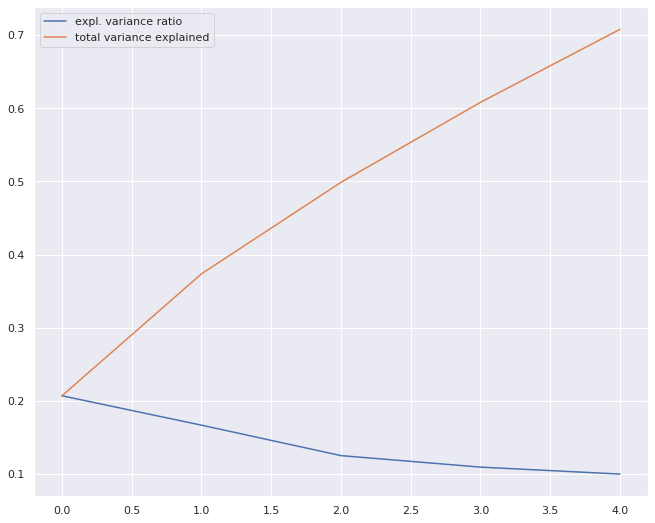

In [0]:
# Is 5 components really a good choice?
sns.set()
sns.lineplot(y = plot_turnover1_reduced.values, x = plot_turnover1_reduced.index.get_level_values(0), hue=plot_turnover1_reduced.index.get_level_values(1))

In [0]:
# How much "information" do we kick out?
model.explained_variance_ratio_.sum()

0.7081243907931449

In [0]:
pcscores = pd.DataFrame(turnover1_reduced)
loadings = pd.DataFrame(model.components_, columns=turnover.columns)
loadings.index = ['PC'+str(i+1) for i in range(len(pcscores.columns))]

ValueError: ignored

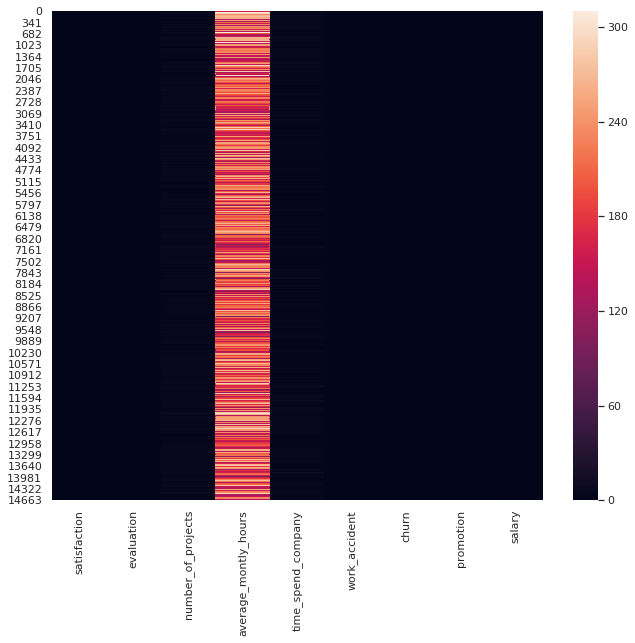

In [0]:
ax = sns.heatmap(turnover1)